## Disease Condition prediction based on drug reviews

In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

## Importing libraries

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
!pip install BeautifulSoup4 


In [3]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [4]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(bs4.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.3.2.
The scikit-learn version is 4.12.2.


In [5]:
df=pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [6]:
df.to_csv('data/drugsComTrain.csv',index=False)

In [7]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [8]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [11]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression')  | (df['condition']=='Pain') | (df['condition']=='Bipolar Disorde') | (df['condition']=='ADHD') | (df['condition']=='Anxiety') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [12]:
df.shape

(161297, 7)

In [13]:
df_train.shape

(62388, 7)

In [14]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

## EDA

In [15]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Pain                    6145
Anxiety                 5904
Bipolar Disorde         4224
ADHD                    3383
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [16]:
X.head()

condition                                             review
1             ADHD  "My son is halfway through his fourth week of ...
2    Birth Control  "I used to take another oral contraceptive, wh...
3    Birth Control  "This is my first time using any form of birth...
7  Bipolar Disorde  "Abilify changed my life. There is hope. I was...
9    Birth Control  "I had been on the pill for many years. When m...

In [17]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

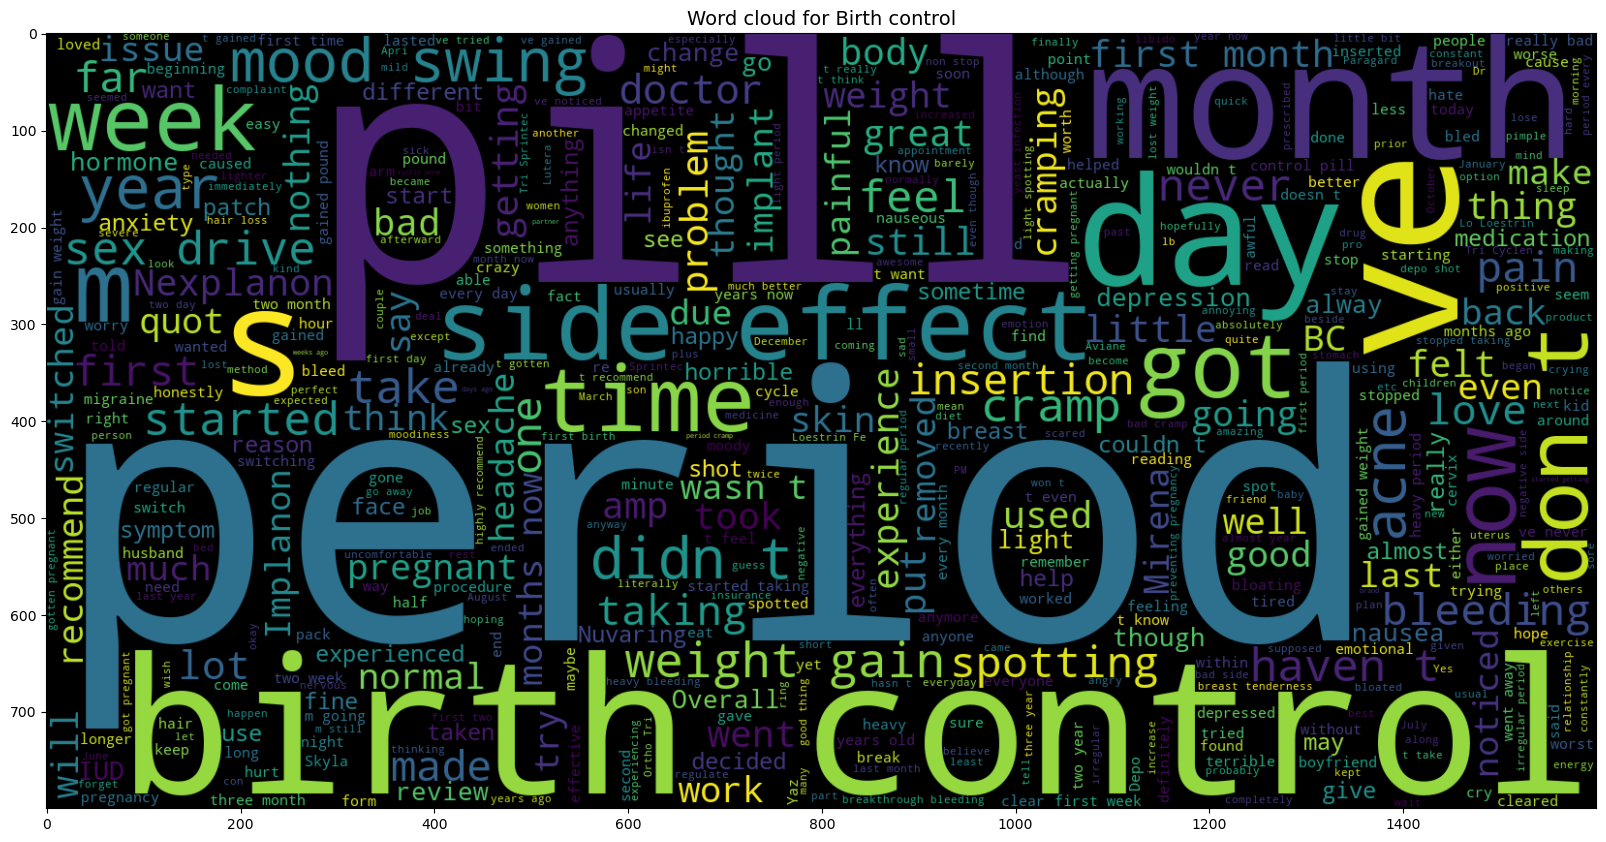

In [20]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

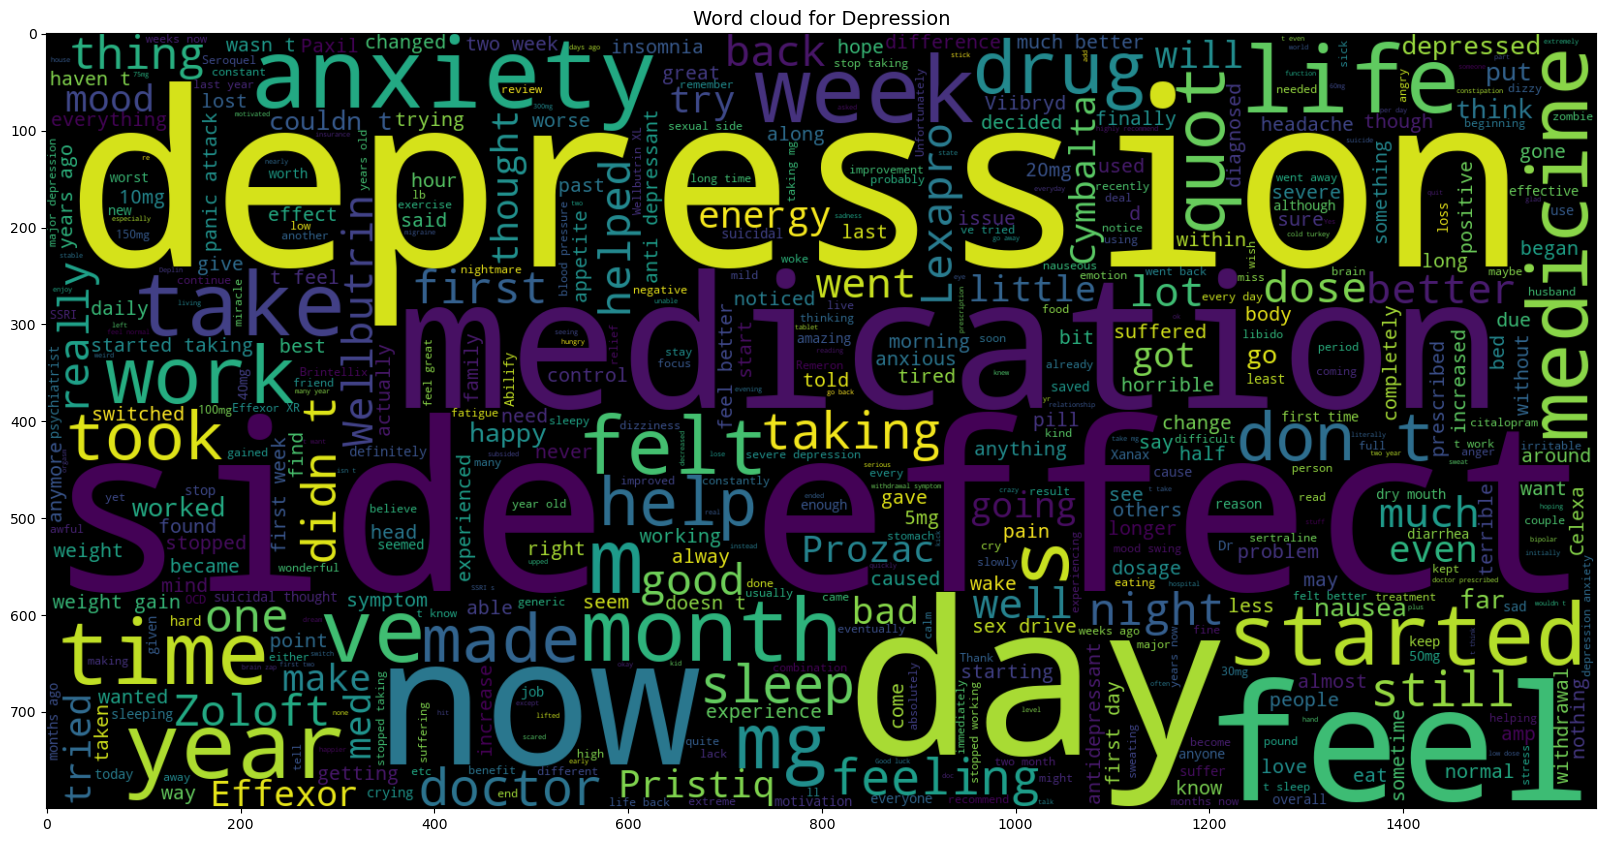

In [21]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

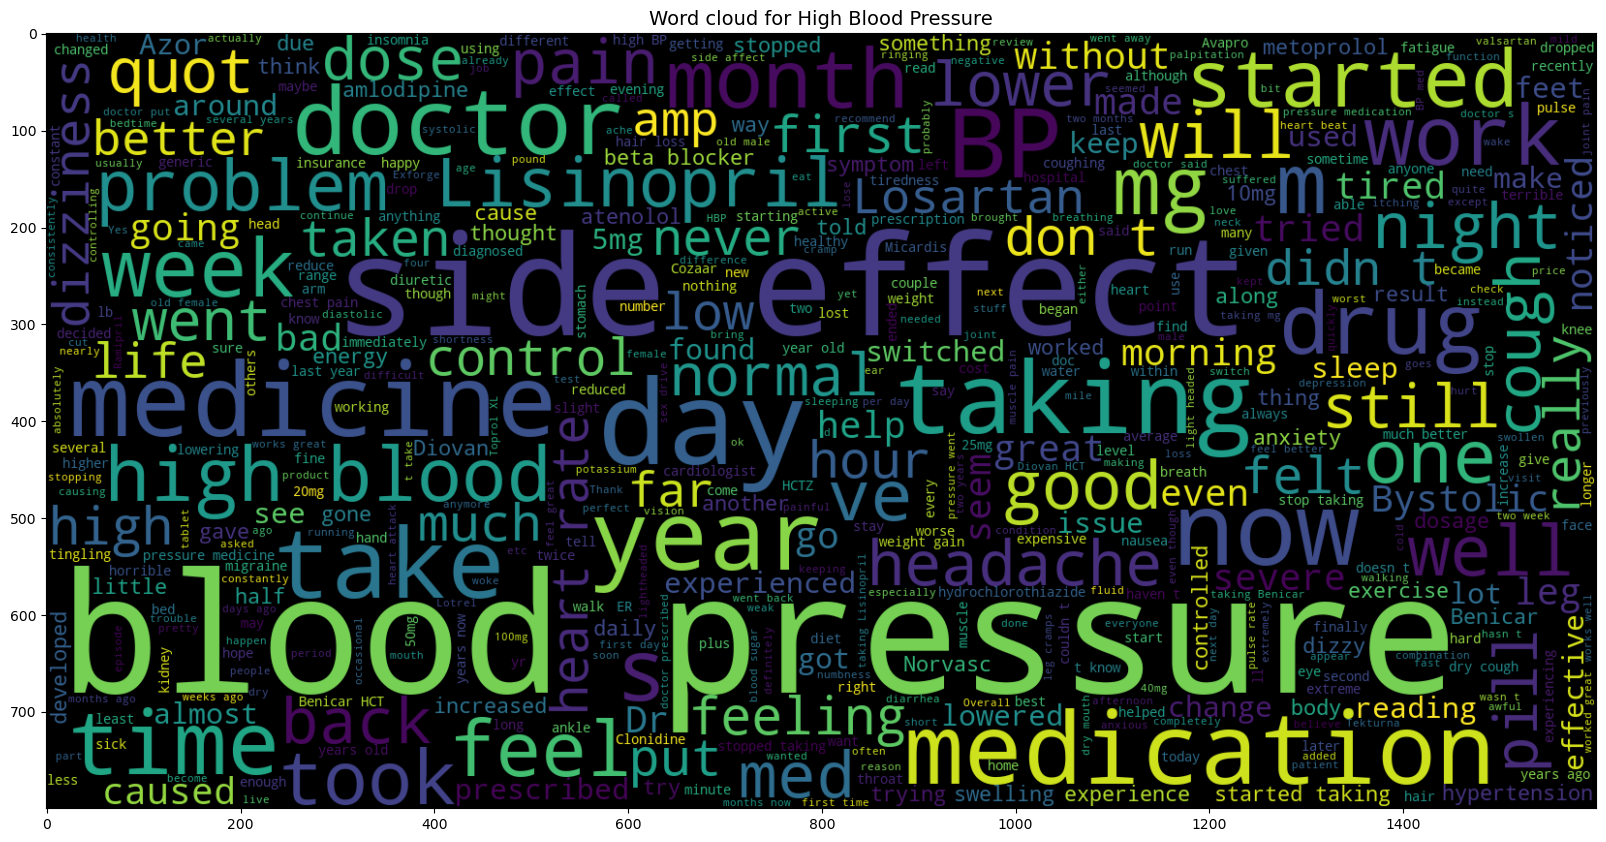

In [22]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

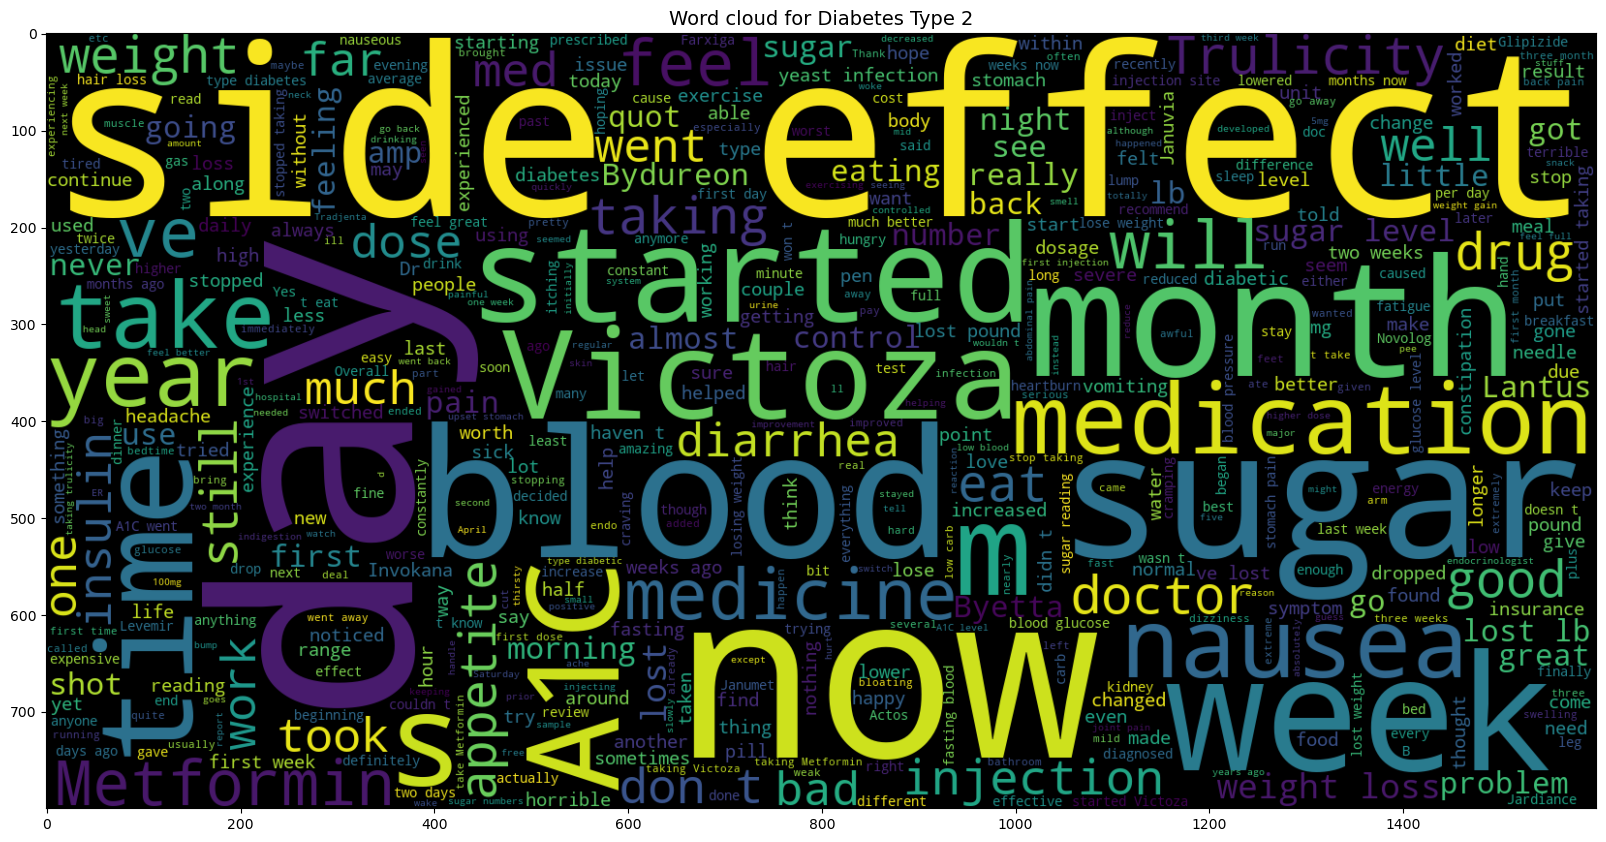

In [23]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

## data preprocessing

In [24]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [25]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [26]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [27]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\SYED AZIZ AHMED\AppData\Local\Temp\ipykernel_17392\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [28]:
X.head()

condition  \
1  ADHD              
2  Birth Control     
3  Birth Control     
7  Bipolar Disorde   
9  Birth Control     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
1  My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.                
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3  This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                       
7  Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.                          
9  I had been on the pill for many years. When my doctor changed my RX 

### What are stopwords ?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are **“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”** etc.

In [29]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [30]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [33]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\SYED AZIZ
[nltk_data]     AHMED\AppData\Roaming\nltk_data...


True

In [39]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [40]:
from bs4 import BeautifulSoup
import re

In [41]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [42]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\SYED AZIZ AHMED\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [43]:
X.head()

condition  \
1  ADHD              
2  Birth Control     
3  Birth Control     
7  Bipolar Disorde   
9  Birth Control     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
1  My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.                 
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3  This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                        
7  Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.                           
9  I had been on the pill for many years. When my doctor changed m

## Creating features and Target Variable

In [44]:
X_feat=X['review_clean']
y=X['condition']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [47]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [48]:
count_train

<49910x20925 sparse matrix of type '<class 'numpy.int64'>'
	with 1535078 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes

accuracy:   0.890
Confusion matrix, without normalization


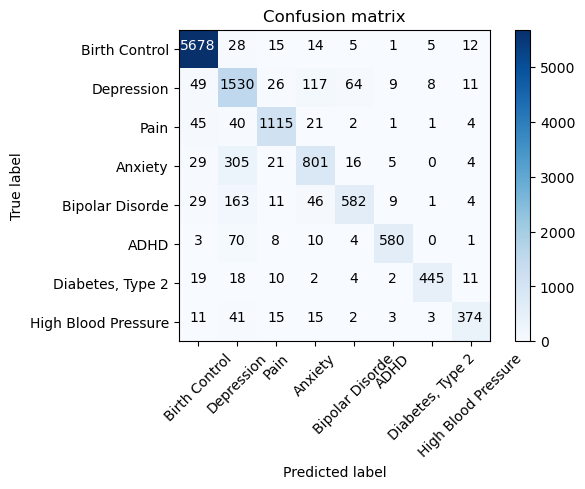

In [57]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.908
Confusion matrix, without normalization


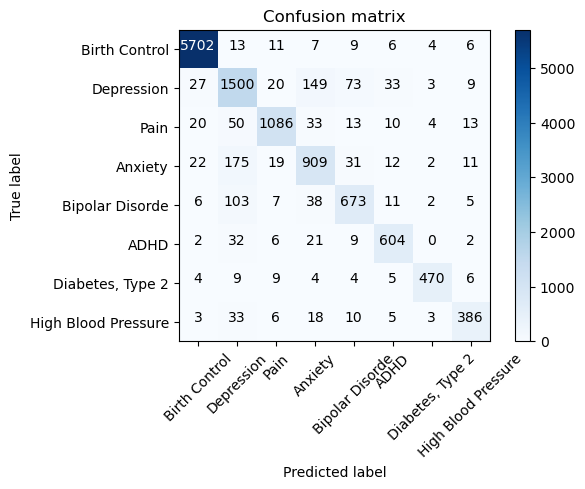

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])

### TFIDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.779
Confusion matrix, without normalization


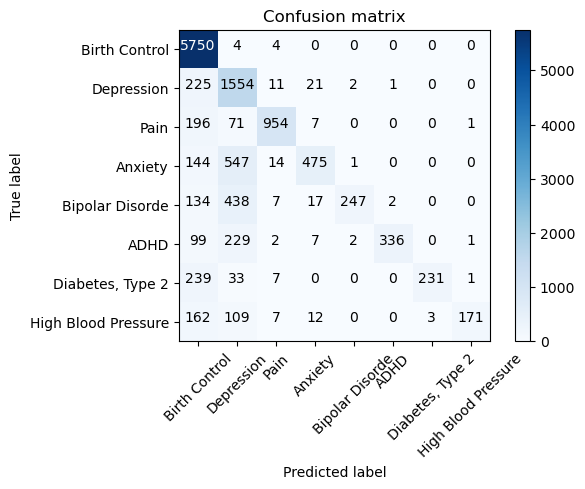

In [60]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model TFIDF

accuracy:   0.916
Confusion matrix, without normalization


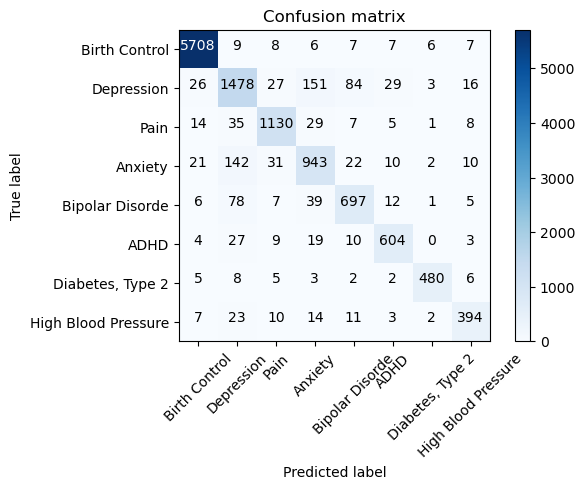

In [61]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])


## TFIDF: Bigrams

In [62]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.938
Confusion matrix, without normalization


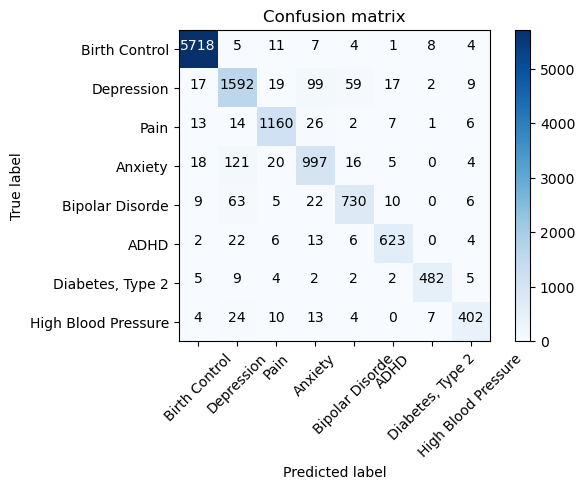

In [63]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])

## TFIDF : Trigrams

accuracy:   0.939
Confusion matrix, without normalization


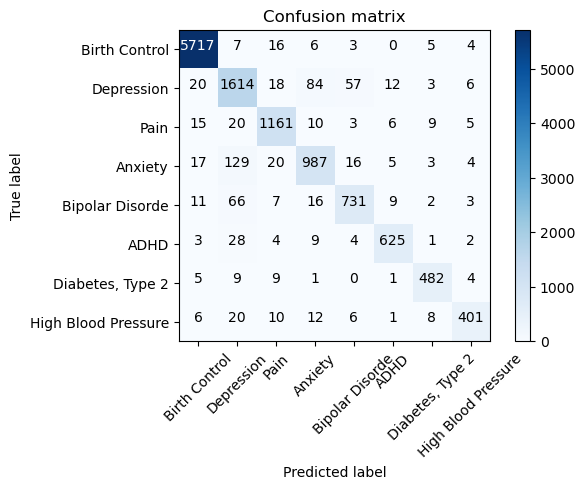

In [64]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain','Anxiety','Bipolar Disorde','ADHD','Diabetes, Type 2','High Blood Pressure'])

## Most important Features

In [67]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control normal minimal 3.343211280762305
Birth Control kick habit 4.054321149943387
Birth Control favorite stopped 5.37789467196139
Birth Control decision yr 5.496883253572515
Birth Control little typically 5.524678178111103
Birth Control like deer 6.508977532385937
Birth Control effect anorexia 7.368622976538318
Birth Control drive stopped 7.700307991838356
Birth Control drive roof 8.099381815762449
Birth Control advise beginning 8.537252764503819


In [68]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression wean cold 3.0030618053778726
Depression managed mood 3.067721729147453
Depression nuvaring patch 3.4999354121237705
Depression similar time 3.63703903295219
Depression normal good 3.6930578545036017
Depression heavy far 4.848521886299923
Depression good fibromyalgia 5.678675156664416
Depression bone sinus 5.97412126915686
Depression felt keel 6.174607261923848
Depression nuvaring amazing 11.884345010548017


In [69]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure subside continuously 2.320977492547819
High Blood Pressure coming scalp 3.264063785813448
High Blood Pressure crampa 3.4399308704734324
High Blood Pressure personal family 3.7573875514368082
High Blood Pressure eng 4.038036896511646
High Blood Pressure difficult reason 4.075782388198174
High Blood Pressure food fluid 4.330130304587705
High Blood Pressure bit forgetful 4.473289586949168
High Blood Pressure level twice 5.853309065999823
High Blood Pressure extra needle 7.813581259995266


In [70]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 painless light 2.27811518198434
Diabetes, Type 2 time encourage 2.3420938487518947
Diabetes, Type 2 short overall 2.3772459644646746
Diabetes, Type 2 ticked 2.5641691002485216
Diabetes, Type 2 avascular necroses 2.6204760756074825
Diabetes, Type 2 amazed high 2.7003976558657135
Diabetes, Type 2 enthusiasm changed 3.2967231465535463
Diabetes, Type 2 pain exertion 4.077043638521382
Diabetes, Type 2 following normal 4.595809834468625
Diabetes, Type 2 follow hope 4.738131470628602


## Sample Predictions

In [87]:
X.tail()

condition  \
161283  Bipolar Disorde       
161286  Depression            
161287  Anxiety               
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
161283  I was in a very bad place at the time I started taking it. My doctor wanted to ween me off of Effexor after 7 years of 300mg of it. I&#039;ll tell you coming off the Effexor is like coming off hard drugs like heroine! I&#039;m not sure if the Zeldox (what they call geodon in Canada) was helping or making it worse. I officially got off the effexor after 10 weeks of weening and I&#039;m still currently on 80mg of Zeldox. I will say you have to eat with this med or else you&#039;re really only giving your body half of what you&#039;re putting in it. I&#039;m a week into lithium at 600mg. I&#039;m feeling fantastic, but I&#039;m thinking about weening off of the Zeldox, I do not believe its being effective and I&#039;m just getting negative side effects from it.   
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
161287  I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1.                               
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                                                                                                                 

In [72]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [73]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [88]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [89]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="ADHD":
        target="ADHD"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Bipolar Disorde":
        target="Bipolar Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Anxiety":
        target="Anxiety"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Pain":
        target="Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective 
Condition: ADHD
Top 3 Suggested Drugs:
Addera

In [77]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                                                   
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                                                           

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [78]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [4]:
import joblib
import scipy
vectorizer = joblib.load('../models/tfidfvectorizer.pkl')
model = joblib.load('../models/passmodel.pkl')

text = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]
text_vectorized = vectorizer.transform(text)

# Get the decision values (confidence scores) from the model
decision_values = model.decision_function(text_vectorized)

# Apply the sigmoid function to squash decision values into [0, 1] range
sigmoid_scores = scipy.special.expit(decision_values)

# Display the predicted class and its confidence scores
predicted_class = model.predict(text_vectorized)[0]
confidence = sigmoid_scores[0, model.classes_ == predicted_class][0] * 100
print("decision_values: ", decision_values)
print("Predicted Class: ", predicted_class)
print("Confidence Score: {:.2f}%".format(confidence))

decision_values:  [[-1.16060548 -1.12376906 -1.16611281 -1.23376963 -1.30284423 -1.27015513
   1.7387459  -1.13687319]]
Predicted Class:  High Blood Pressure
Confidence Score: 85.05%
